# Assignment 3

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Clustering and Resampling

Let's set up our workspace and use the **Iris dataset** from `scikit-learn`. This dataset is a classic dataset in machine learning and statistics, widely used for clustering tasks. It consists of many samples of iris flowers. Here are the key features and characteristics of the dataset:

##### Features:
1. **Sepal Length**: The length of the sepal in centimeters.
2. **Sepal Width**: The width of the sepal in centimeters.
3. **Petal Length**: The length of the petal in centimeters.
4. **Petal Width**: The width of the petal in centimeters.

In [234]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


#### **Question 1:** 
#### Data inspection

#### Load the Iris dataset:

Use scikit-learn to load the Iris dataset and convert it into a Pandas DataFrame.
Display the first few rows of the dataset. How many observations (rows) and features (columns) does the dataset contain?

In [235]:
from sklearn.datasets import load_iris
# Load the Iris dataset
iris_data = load_iris()

# Convert to DataFrame
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# Display the DataFrame
print(iris_df)

# Your code here...
print("\nTop 5 rows in IRIS Data Set : \n\n",iris_df.head())
rows, cols = iris_df.shape
print("\n\nNumber of Rows(Observations) in IRIS Dataset : ", rows)
print("\nNumber of Columns(features) in IRIS Dataset : ", cols)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

Top 5 rows in IRIS Data Set : 

    sep

In [236]:
#EDA
print(iris_df.info())
print(iris_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000 

Data exploration notes 

From  above, we can say that the
- maximum sepal length of an Iris flower is 7.9cm while the minimum sepal length is 4.3cm.
- max sepal width is 4.4 and min is 3.05
- max petal lenght is 6.9 and min is 3.75
- max petal width is 2.5 and min is 0.10
- **mean** is 1.19


#### **Question 2:** 
#### Data-visualization

Let's create plots to visualize the relationships between the features (sepal length, sepal width, petal length, petal width).


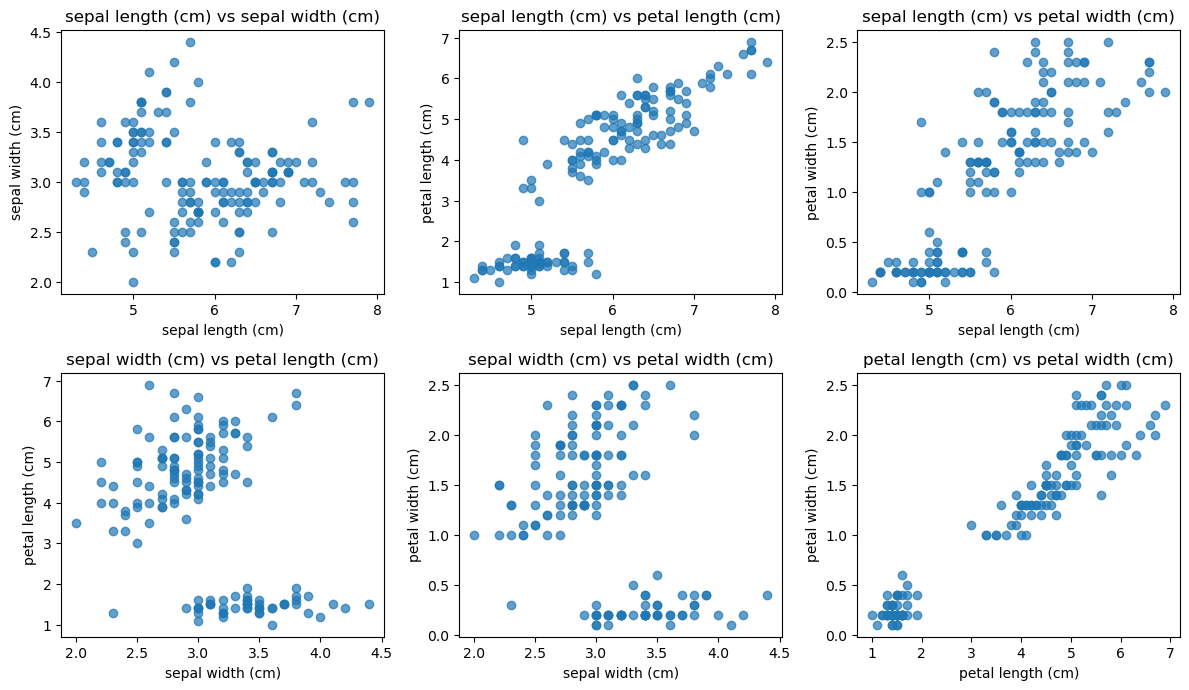

In [237]:
def plot_feature_pairs(data, feature_names, color_labels=None, title_prefix=''):
    """
    Helper function to create scatter plots for all possible pairs of features.
    
    Parameters:
    - data: DataFrame containing the features to be plotted.
    - feature_names: List of feature names to be used in plotting.
    - color_labels: Optional. Cluster or class labels to color the scatter plots.
    - title_prefix: Optional. Prefix for plot titles to distinguish between different sets of plots.
    """
    # Create a figure for the scatter plots
    plt.figure(figsize=(12, 10))
    
    # Counter for subplot index
    plot_number = 1
    
    # Loop through each pair of features
    for i in range(len(feature_names)):
        for j in range(i + 1, len(feature_names)):
            plt.subplot(len(feature_names)-1, len(feature_names)-1, plot_number)
            
            # Scatter plot colored by labels if provided
            if color_labels is not None:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], 
                            c=color_labels, cmap='viridis', alpha=0.7)
            else:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], alpha=0.7)
            
            plt.xlabel(feature_names[i])
            plt.ylabel(feature_names[j])
            plt.title(f'{title_prefix}{feature_names[i]} vs {feature_names[j]}')
            
            # Increment the plot number
            plot_number += 1

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# Get feature names
feature_names = iris_df.columns

# Use the helper function to plot scatter plots without coloring by cluster labels
plot_feature_pairs(iris_df, feature_names, title_prefix='')

**Question:**
- Do you notice any patterns or relationships between the different features? How might these patterns help in distinguishing between different species?

**Answer**

<div class="alert alert-info">

- From the scatter plots we can observe features namely Petal length and petal width, are showing distict groups/clusters and can be useful  indicators of different iris species.

- Sepal length and sepal width  features are showing some group patterns but those are not clear and  hence makes it not so useful indicators to differentiate between various iris species.

</div>

#### **Question 3:** 
#### Data cleaning

In [238]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale all the features in the dataset
scaled_features = scaler.fit_transform(iris_df)

# Create a new DataFrame with scaled features
scaled_iris_df = pd.DataFrame(scaled_features, columns=iris_data.feature_names)

# Display the first few rows of the scaled DataFrame
print(scaled_iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


Why is it important to standardize the features of a dataset before applying clustering algorithms like K-Means? Discuss the implications of using unstandardized data in your analysis.

**Answer**

<div class="alert alert-info">

*Standardization* of features  ensures that all features contribute equally to the distance calculations, preventing any single feature from dominating the results due to its scale. In summary, standardizing features is essential for ensuring that clustering algorithms like K-Means produce meaningful, interpretable results, and it helps in achieving efficient and effective analysis.Standardizing ensures both features contribute equally to the grouping process, which is critical when feature ranges differ significantly.

*Unstandardized* data can cause following implications -
- Misleading Clusters: Clusters may not represent meaningful groupings in the data, as they could be heavily influenced by a few dominant features.

- Poor Model Performance: If the clusters formed are not representative of the underlying data structure, subsequent analyses (e.g., classification, prediction) may perform poorly.

- Difficulty in Interpretation: Analysts may struggle to interpret results, as the importance of different features can be obscured by scale differences.

- Inefficient Resource Use: Increased computational cost due to the inefficiency of the clustering process on unstandardized data.
</div>



#### **Question 4:** 
#### K-means clustering 

Apply the K-Means clustering algorithm to the Iris dataset. Choose the value 3 for the number of clusters (`k=3`) and fit the model. Assign cluster labels to the original data and add them as a new column in the DataFrame.

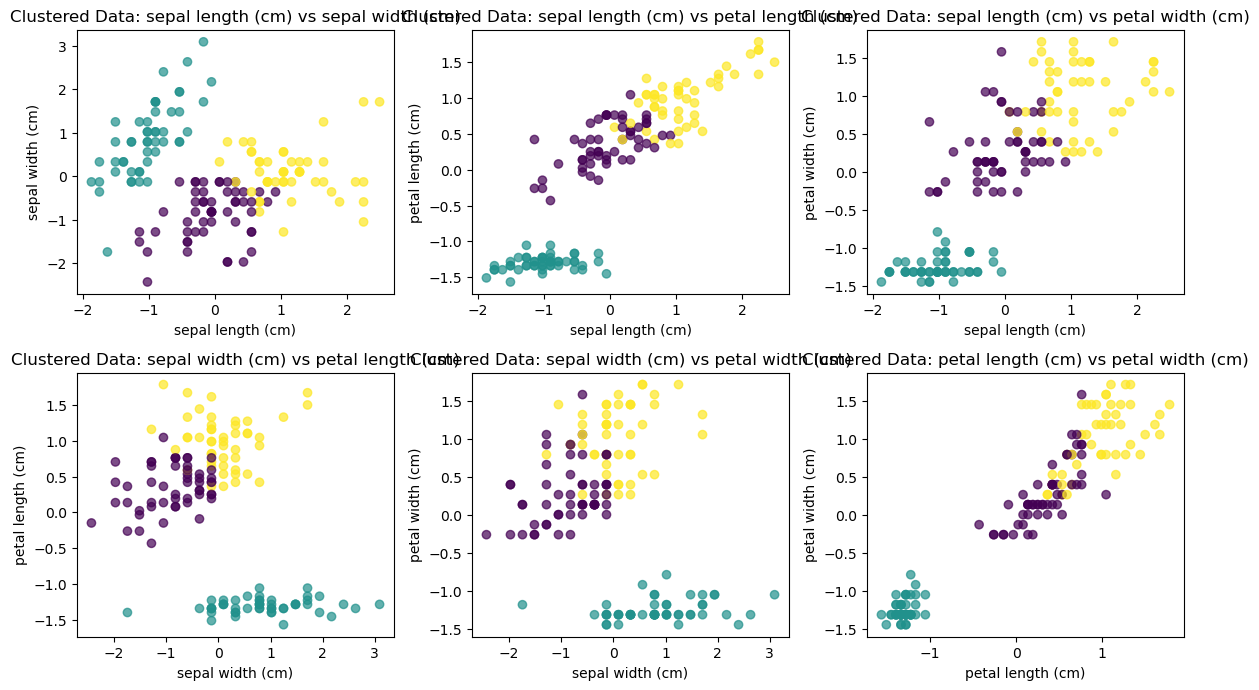

In [239]:
# Your answer...
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
clusters = kmeans.fit(scaled_iris_df)
clustered_iris_data = scaled_iris_df.copy()
# Add cluster labels to the copied DataFrame
clustered_iris_data['Cluster'] = clusters.labels_

# Use the helper function to plot scatter plots, colored by cluster labels
plot_feature_pairs(clustered_iris_data, feature_names, color_labels=clustered_iris_data['Cluster'], title_prefix='Clustered Data: ')

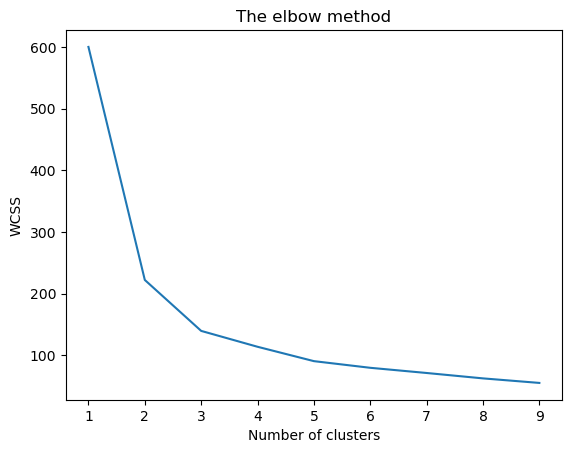

In [240]:
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled_iris_df)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

We chose `k=3` for the number of clusters arbitrarily. However, in a real-world scenario, it is important to determine the optimal number of clusters using appropriate methods.

**Question**: What is one method commonly used to determine the optimal number of clusters in K-means clustering, and why is this method helpful?


**Answer**

<div class="alert alert-info">
Commonly used method to determine the optimal number of clusters in K-means clustering is the *Elbow Method*.

The elbow method is very intuitive, find the point where the elbow starts.

    - Visual Insight: The method provides a visual representation that helps identify a balance between minimizing inertia and keeping the number of clusters manageable.
    - Avoid Overfitting: By selecting a point before the inertia decreases significantly with additional clusters, you prevent overfitting, where the model may fit the noise in the data rather than the underlying patterns.
    - Simplifies Decision Making: It offers a straightforward heuristic to choose the number of clusters, making it accessible for analysts and data scientists.

</div>

#### **Question 5:** 
#### Bootstrapping 

Implement bootstrapping on the mean of Petal Width. Generate 10000 bootstrap samples, calculate the mean for each sample, and compute a 90% confidence interval.

In [241]:
# Your answer here...

mean_petal_width_original_data = iris_df['petal width (cm)'].mean()
print(f"Mean of Petal Widt Original dataset h: {mean_petal_width_original_data:.2f}")
#np.random.seed(123)

# Initialize an empty list to store the bootstrap samples
bootstrap_samples = []
#bootstrap_means = [np.mean(np.random.choice(iris_df['petal width (cm)'], size=len(iris_df), replace=True)) for _ in range(10000)]


for i in range(10000):
    sample = iris_df.sample(frac=1, replace=True)  # Sample with replacement
    sample = sample.assign(replicate=i)  # Add replicate number
    bootstrap_samples.append(sample)  # Store the sample

# Combine all bootstrap samples into one DataFrame
boot10000 = pd.concat(bootstrap_samples)

# Calculate the mean petal width for each bootstrap sample (replicate)
boot_means = boot10000.groupby('replicate')['petal width (cm)'].mean().reset_index(name='mean_petal_width')
#print("##########",boot_means)
mean_petal_width = np.mean(boot_means['mean_petal_width'])


lower_bound = np.percentile(boot_means["mean_petal_width"], 5)
upper_bound = np.percentile(boot_means["mean_petal_width"], 95)


# Display the result rounded to 2 decimal places.
print(f"Mean of Petal Width: {mean_petal_width:.2f}")
print(f"90% Confidence Interval of Mean Petal Width: ({lower_bound:.2f}, {upper_bound:.2f})")

Mean of Petal Widt Original dataset h: 1.20
Mean of Petal Width: 1.20
90% Confidence Interval of Mean Petal Width: (1.10, 1.30)


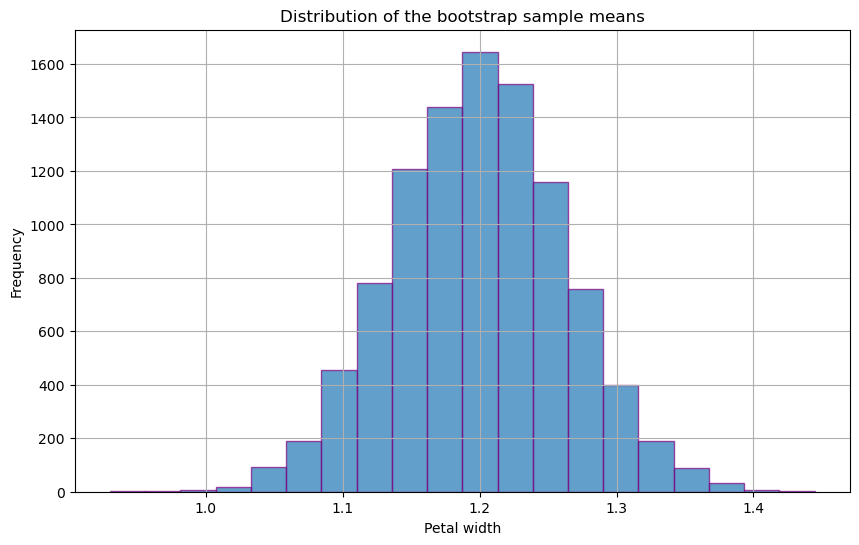

In [242]:
# Plot the histogram of the bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(boot_means['mean_petal_width'], bins=20, edgecolor='purple', alpha=0.7)

# Add titles and labels
plt.title('Distribution of the bootstrap sample means')
plt.xlabel('Petal width')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

**Question:**
- Why do we use bootstrapping in this context? What does it help us understand about the mean?


**Answer**

<div class="alert alert-info">
Bootstrapping  helps us estimate how much our average petal width might vary if we could take different samples from the population and provide us information about the reliability of our estimates.
<br/>
Bootstrapping the <b>mean</b> is a powerful technique that enhances our understanding of the mean's reliability and variability, making it a valuable tool in statistical analysis.
Bootstrapping works by <b>re-sampling</b> from the available data. By creating many new samples (by randomly selecting data points with replacement), we can build a <b>distribution</b> of <i>possible</i> estimates. This distribution helps us understand how much our sample mean estimate on petal width might vary and gives us a range of likely values, which we can use to assess the uncertainty around our sample estimate.


</div>

**Question:**
- What is the purpose of calculating the confidence interval from the bootstrap samples? How does it help us interpret the variability of the estimate?


**Answer**

<div class="alert alert-info">

Confidence intervals derived from bootstrap samples enhance our interpretation of variability, helping us gauge the reliability and robustness of our estimates, which is crucial for sound statistical analysis and decision-making.

For variability assessment - By analyzing the spread of the bootstrap samples, we can see how much the sample mean varies. A wider confidence interval indicates greater variability and uncertainty in our estimate, while a narrower interval suggests more precision.
</div>

**Question:**

- Reflect on the variability observed in the bootstrapped means and discuss whether the mean of the Petal Width appears to be a stable and reliable estimate based on the confidence interval and the spread of the bootstrapped means.

**Answer**

<div class="alert alert-info">

- **90% Confidence Interval**: We estimate that the true mean petal-width for all species listed in Iris data set is between *(1.10, 1.30)*
Looking at the confidence interval and spread of bootstrapped means, the mean of Petal Width appears to be a stable and reliable estimate. The narrow confidence interval suggests that our sample mean is likely close to the population mean, indicating stable estimation. the spread of bootstrapped means shows less variability, suggesting that our estimate is reliable.

</div>

# Criteria


| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is thoroughly inspected for the number of variables, observations, and data types, and relevant insights are noted. | Data inspection is missing or lacks detail.         |
| **Data Visualization**                                 | Visualizations (e.g., scatter plots) are well-constructed and correctly interpreted to explore relationships between features and species. | Visualizations are poorly constructed or not correctly interpreted. |
| **Clustering Implementation**                           | K-Means clustering is correctly implemented, and cluster labels are appropriately assigned to the dataset.            | K-Means clustering is missing or incorrectly implemented. |
| **Bootstrapping Process**                              | Bootstrapping is correctly performed, and results are used to assess variable mean stability. | Bootstrapping is missing or incorrectly performed. |

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-4-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
